# Engenharia do Conhecimento 2024/2025 - Final Report

---

## 📚 Step 1: Exploratory Data Analysis (EDA)


## 1.0 导入


In [68]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models (used later,提前导入无影响)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import (
    precision_score, recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report, r2_score,
    mean_absolute_error, mean_squared_error
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
import pickle

### 1.1 Load Data
- 读取数据集
- 简要展示数据样本（df.head()）

In [69]:
df = pd.read_csv("./data/custom_covid19.csv")

# Show basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Optional: Check basic info
print("\nDataset Info:")
df.info()

Dataset shape: (100000, 21)

First 5 rows of the dataset:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,TEST_RESULT,ICU
0,2,12,1,1,9999-99-99,97,2,41,2,2,...,2,2,2,2,2,2,2,2,7,97
1,2,12,2,1,9999-99-99,97,2,57,2,1,...,2,2,2,2,2,1,2,1,5,97
2,2,4,2,1,9999-99-99,97,2,38,2,2,...,2,2,2,2,2,1,2,1,3,97
3,2,9,1,1,9999-99-99,97,2,68,2,2,...,2,2,2,2,1,2,2,2,7,97
4,1,12,2,1,9999-99-99,97,2,63,2,2,...,2,2,1,2,2,2,2,2,7,97



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           100000 non-null  int64 
 1   MEDICAL_UNIT    100000 non-null  int64 
 2   SEX             100000 non-null  int64 
 3   PATIENT_TYPE    100000 non-null  int64 
 4   DATE_DIED       100000 non-null  object
 5   INTUBED         100000 non-null  int64 
 6   PNEUMONIA       100000 non-null  int64 
 7   AGE             100000 non-null  int64 
 8   PREGNANT        100000 non-null  int64 
 9   DIABETES        100000 non-null  int64 
 10  COPD            100000 non-null  int64 
 11  ASTHMA          100000 non-null  int64 
 12  INMSUPR         100000 non-null  int64 
 13  HYPERTENSION    100000 non-null  int64 
 14  OTHER_DISEASE   100000 non-null  int64 
 15  CARDIOVASCULAR  100000 non-null  int64 
 16  OBESITY         100000 non-null  int64 
 17  RENAL_CHRONIC  


### 1.2 Variable Types
- 分类变量、数值变量识别
- 统计各列数据类型

In [70]:
# 统计每列的数据类型
print("\nData Types by Column:")
display(pd.DataFrame(df.dtypes, columns=["DataType"]))

# 按类型粗略分组
categorical_features = []
numerical_features = []
special_features = []

for col in df.columns:
    if col == "DATE_DIED":
        special_features.append(col)
    elif col == "AGE":
        numerical_features.append(col)
    else:
        categorical_features.append(col)

# 打印分类结果
print("\n📋 Feature Type Summary:")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Special Features (Need Processing): {special_features}")

# （专业化表格输出）
var_types_df = pd.DataFrame({
    "Column Name": df.columns,
    "Detected Type": ["Special" if col in special_features else
                      "Numerical" if col in numerical_features else
                      "Categorical" for col in df.columns]
})

print("\n📊 Variable Type Table:")
display(var_types_df)

# 生成 DIED 列，1 表示死亡，0 表示未死亡
df['DIED'] = df['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

print("\n🩺 Added 'DIED' column (0 = alive, 1 = deceased)")
display(df[['DATE_DIED', 'DIED']].head())


Data Types by Column:


,DataType
USMER,int64
MEDICAL_UNIT,int64
SEX,int64
PATIENT_TYPE,int64
DATE_DIED,object
INTUBED,int64
PNEUMONIA,int64
AGE,int64
PREGNANT,int64
DIABETES,int64



📋 Feature Type Summary:
Categorical Features (19): ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'TEST_RESULT', 'ICU']
Numerical Features (1): ['AGE']
Special Features (Need Processing): ['DATE_DIED']

📊 Variable Type Table:


,Column Name,Detected Type
0,USMER,Categorical
1,MEDICAL_UNIT,Categorical
2,SEX,Categorical
3,PATIENT_TYPE,Categorical
4,DATE_DIED,Special
5,INTUBED,Categorical
6,PNEUMONIA,Categorical
7,AGE,Numerical
8,PREGNANT,Categorical
9,DIABETES,Categorical



🩺 Added 'DIED' column (0 = alive, 1 = deceased)


,DATE_DIED,DIED
0,9999-99-99,0
1,9999-99-99,0
2,9999-99-99,0
3,9999-99-99,0
4,9999-99-99,0



### 1.3 Missing Values Detection
- 统计每列缺失值
- 绘制缺失值分布图（可选）


🔍 Missing Values per Column:
DATE_DIED         92662
ICU               81502
INTUBED           81491
PNEUMONIA          1577
OTHER_DISEASE       456
PREGNANT            352
DIABETES            343
INMSUPR             331
TOBACCO             326
HYPERTENSION        301
COPD                295
RENAL_CHRONIC       295
CARDIOVASCULAR      294
ASTHMA              287
OBESITY             276
AGE                  31
dtype: int64


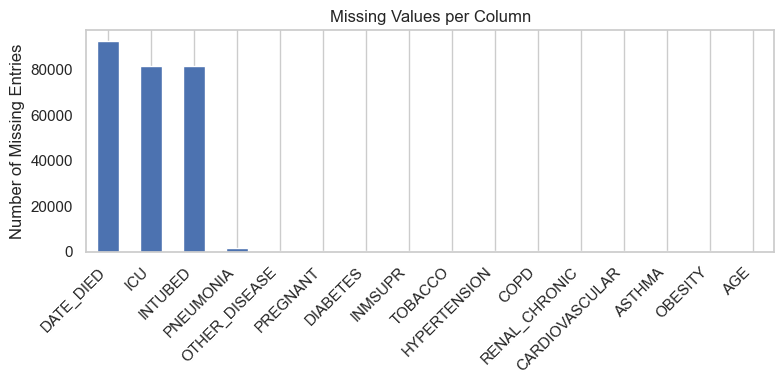

In [71]:
# 查看每列的缺失值数量
missing_values = df.isin([97, 98, 99]).sum()  # 97,98,99 表示缺失 according to project description

# 单独检查 DATE_DIED 特殊缺失 ('9999-99-99')
missing_values['DATE_DIED'] = (df['DATE_DIED'] == '9999-99-99').sum()

# 打印每列缺失情况
print("🔍 Missing Values per Column:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

# 可选：绘制缺失值条形图
import matplotlib.pyplot as plt

if missing_values.sum() > 0:
    plt.figure(figsize=(8,4))
    missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar')
    plt.title('Missing Values per Column')
    plt.ylabel('Number of Missing Entries')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values detected!")


### 1.4 Outlier Detection (1D Analysis)
- 识别数值型变量异常值（如IQR方法）
- 可选：绘制箱型图（boxplot）

Feature: AGE
Lower Bound: -4.50
Upper Bound: 87.50
Number of Outliers Detected: 530
--------------------------------------------------


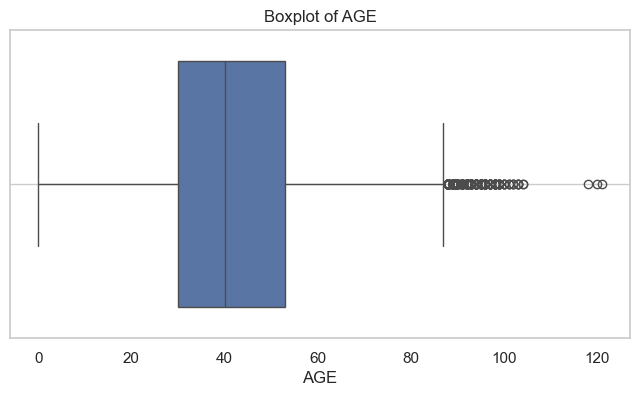


🔎 Descriptive Statistics:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,TEST_RESULT,ICU,DIED
count,100000.00,100000.00,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,...,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,1.63,8.98,1.5,1.19,79.40,3.40,41.73,2.33,2.21,2.27,...,2.30,2.13,2.41,2.26,2.11,2.26,2.23,5.30,79.42,0.07
std,0.48,3.73,0.5,0.39,36.97,12.11,16.92,5.69,5.63,5.21,...,5.52,5.28,6.47,5.20,5.06,5.21,5.48,1.88,36.93,0.26
min,1.00,1.00,1.0,1.00,1.00,1.00,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,1.00,4.00,1.0,1.00,97.00,2.00,30.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,97.00,0.00
50%,2.00,12.00,1.0,1.00,97.00,2.00,40.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,97.00,0.00
75%,2.00,12.00,2.0,1.00,97.00,2.00,53.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,97.00,0.00
max,2.00,13.00,2.0,2.00,99.00,99.00,121.00,98.00,98.00,98.00,...,98.00,98.00,98.00,98.00,98.00,98.00,98.00,7.00,99.00,1.00


In [72]:
# 选取数值型特征（这里只剩AGE）
numerical_features = ['AGE']

# 使用IQR方法检测异常值
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    print(f"Feature: {feature}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers Detected: {outliers.shape[0]}")
    print("-" * 50)

    # 画箱型图（Boxplot）
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.grid()
    plt.show()

# ------------------------------
# 描述性统计（Descriptive Statistics）
# ------------------------------
print("\n🔎 Descriptive Statistics:")
desc = df.describe().round(2)  # 保留2位小数
display(desc)


### 1.5 Variable Distributions
- 单变量分布图（histogram）
- 多变量关系（pairplot）

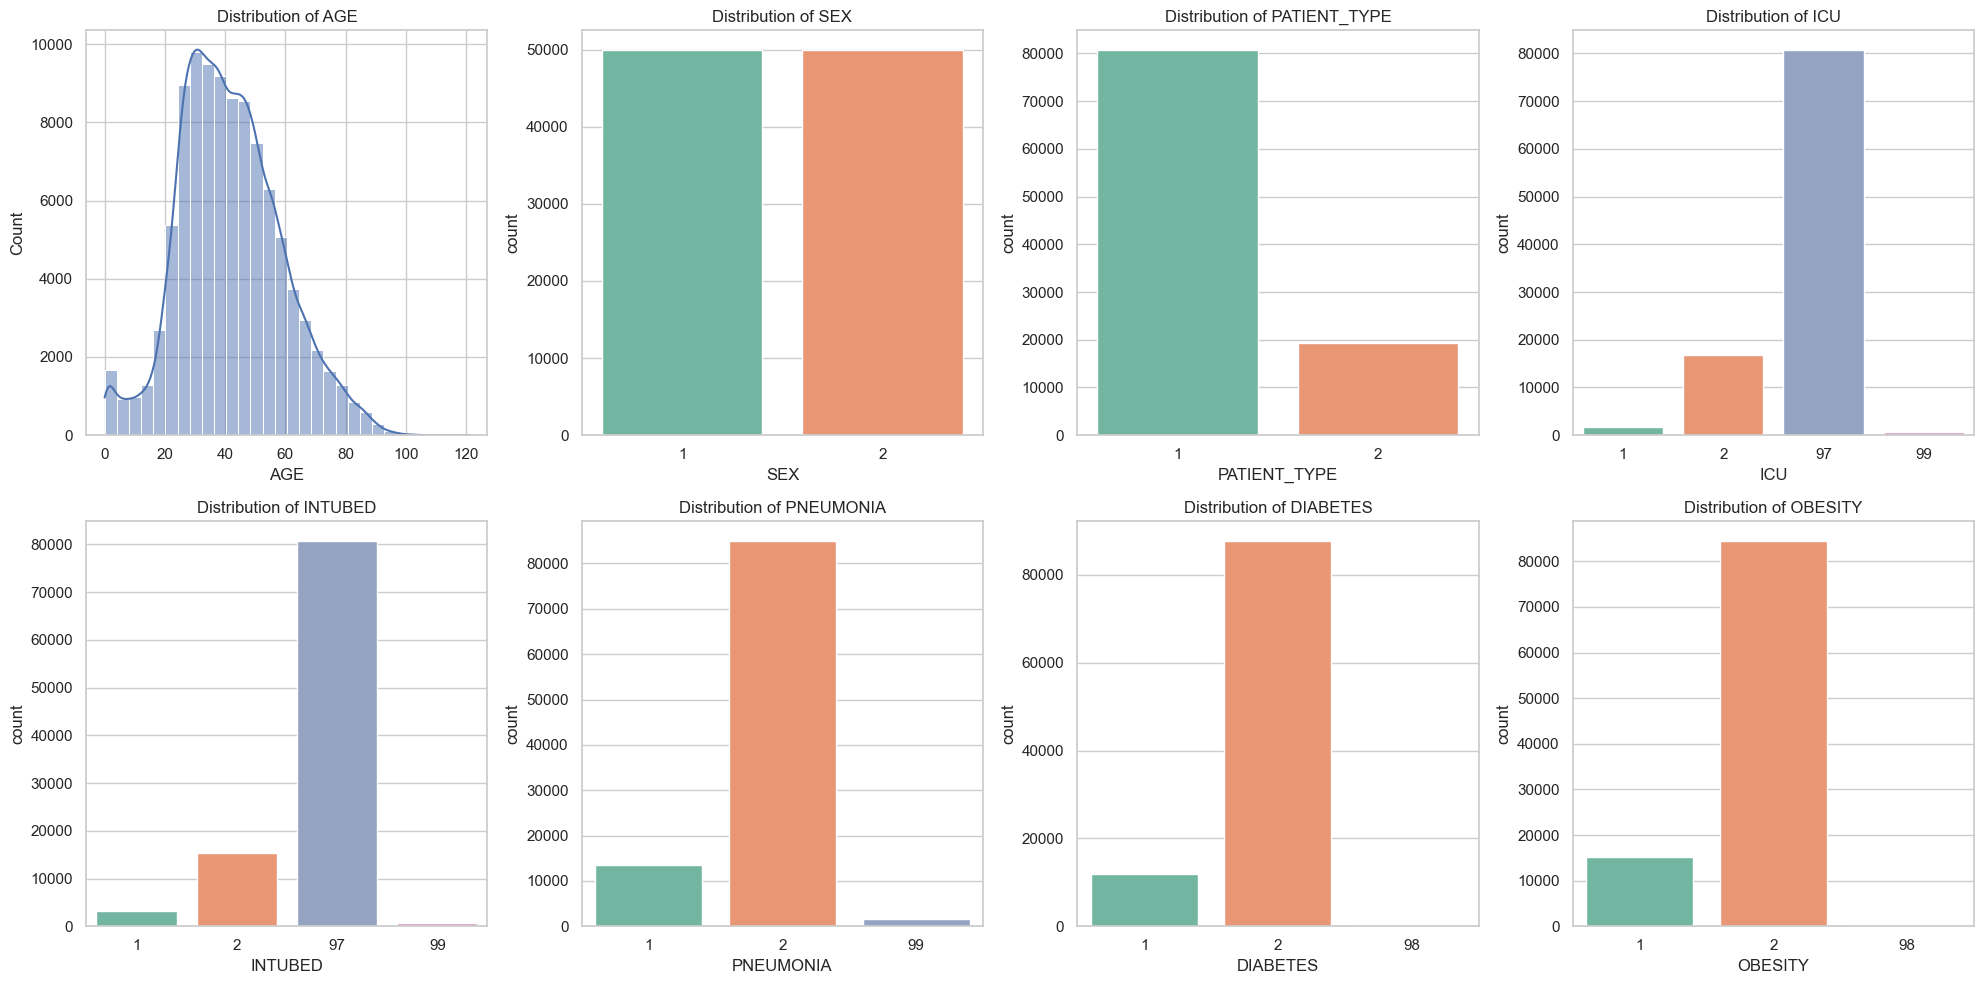

In [73]:
# 设置统一风格
sns.set(style="whitegrid")

# 选取需要绘制的列
columns_to_plot = ['AGE', 'SEX', 'PATIENT_TYPE', 'ICU', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'OBESITY']

# 每行显示4张图，自动换行
plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)
    if df[column].nunique() <= 10:  # 如果是分类变量，用计数图
        sns.countplot(x=column, data=df, hue=column, palette="Set2", legend=False)
    else:  # 如果是数值变量，用直方图
        sns.histplot(df[column], bins=30, kde=True)
    
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


### 1.6 Correlation Analysis
- 计算特征相关系数矩阵
- 可选：绘制热力图（heatmap）

🔍 Correlation Matrix (partial view):
              USMER  MEDICAL_UNIT   SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  \
USMER          1.00          0.13 -0.00         -0.19     0.18      -0.16   
MEDICAL_UNIT   0.13          1.00  0.01         -0.21     0.21      -0.04   
SEX           -0.00          0.01  1.00          0.09    -0.09      -0.01   
PATIENT_TYPE  -0.19         -0.21  0.09          1.00    -0.98       0.02   
INTUBED        0.18          0.21 -0.09         -0.98     1.00       0.08   

               AGE  PREGNANT  DIABETES  COPD  ...  INMSUPR  HYPERTENSION  \
USMER        -0.04     -0.00      0.01  0.01  ...     0.00          0.02   
MEDICAL_UNIT -0.08      0.03      0.02  0.02  ...     0.01          0.02   
SEX           0.03     -0.06      0.01  0.01  ...     0.01          0.01   
PATIENT_TYPE  0.31     -0.01      0.01  0.02  ...     0.03          0.01   
INTUBED      -0.31      0.02     -0.01 -0.02  ...    -0.02         -0.01   

              OTHER_DISEASE  CARDIOVASCULAR

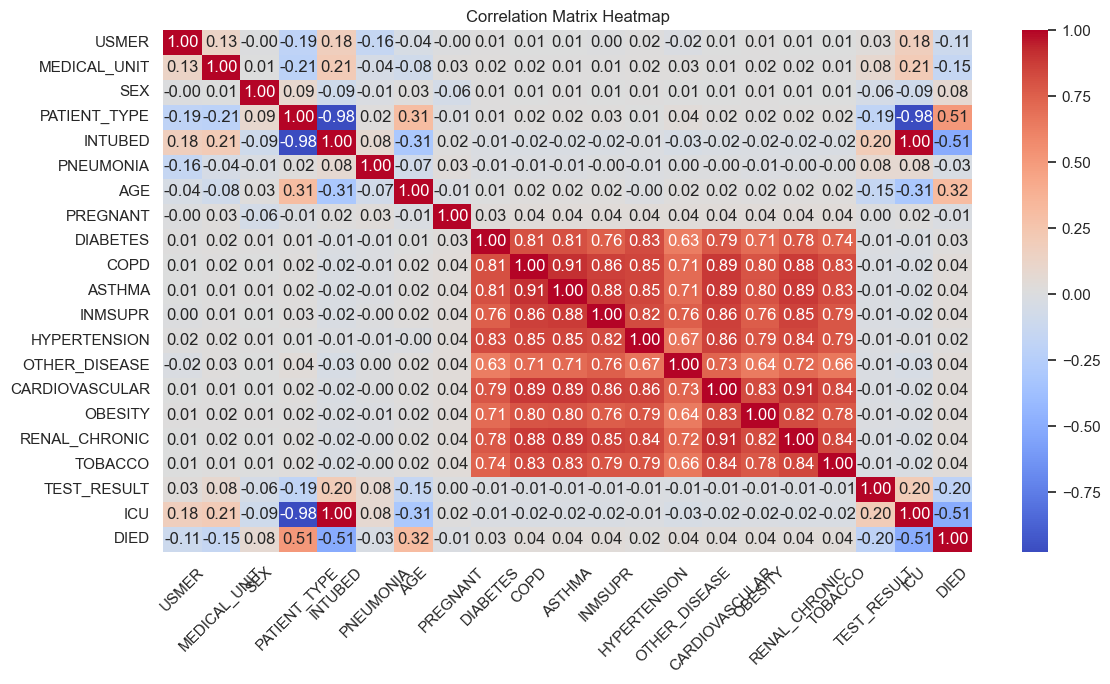

In [74]:
# 只选择数值型特征
numeric_features = df.select_dtypes(include=["int64", "float64"])

# 计算数值型特征之间的相关系数矩阵
correlation_matrix = numeric_features.corr()

# 打印相关系数矩阵 (可选，只打印前几行)
print("🔍 Correlation Matrix (partial view):")
print(correlation_matrix.round(2).head())

# 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 1.7 Important Feature Recognition
- 按经验/统计初步筛选重要特征
- 可标记为 "O1/ O2/ O3 相关特征"

In [75]:
# --- 1.6.1 简单的统计分析: 特征与目标变量的相关性 ---

# Death Prediction 任务 (O1) 相关特征探索
# 这里只能粗略看，因为O1最终的y变量是死亡状态，而不是单纯AGE

# 先简单查看 AGE 和其他特征之间的相关性（用于O2）
print("\n🔍 Features most correlated with AGE (Top 10):")
age_correlations = correlation_matrix["AGE"].drop("AGE").sort_values(ascending=False)
print(age_correlations.head(10))

# 同时也可以看 TEST_RESULT（Covid检测结果）相关特征（用于O3）
print("\n🔍 Features most correlated with TEST_RESULT (Top 10):")
test_result_correlations = correlation_matrix["TEST_RESULT"].drop("TEST_RESULT").sort_values(ascending=False)
print(test_result_correlations.head(10))


# --- 1.6.2 按经验+理解 标记特征 ---
# （以下是根据题目背景和医学常识进行的人工初步标记）

important_features_O1 = [
    "AGE", "INTUBED", "ICU", "PNEUMONIA", "DIABETES", "COPD", "HYPERTENSION", 
    "OBESITY", "RENAL_CHRONIC", "CARDIOVASCULAR"
]

important_features_O2 = [
    # 预测年龄相关的，可以考虑慢性病、吸烟等因素
    "DIABETES", "COPD", "TOBACCO", "HYPERTENSION", "CARDIOVASCULAR",
    "RENAL_CHRONIC", "OBESITY", "ASTHMA", "INMSUPR"
]

important_features_O3 = [
    # 仅限死亡患者中，区分Covid感染与否
    "TEST_RESULT", "ICU", "INTUBED", "PNEUMONIA", "AGE"
]

# --- 1.6.3 打印重要特征分类 ---

print("\n📌 Important Features for O1 (Death Prediction):")
print(important_features_O1)

print("\n📌 Important Features for O2 (Age Prediction):")
print(important_features_O2)

print("\n📌 Important Features for O3 (Covid vs Non-Covid in Deceased):")
print(important_features_O3)


🔍 Features most correlated with AGE (Top 10):
DIED              0.319971
PATIENT_TYPE      0.306562
SEX               0.025538
OTHER_DISEASE     0.023735
ASTHMA            0.023715
TOBACCO           0.023101
INMSUPR           0.022631
RENAL_CHRONIC     0.022388
COPD              0.020912
CARDIOVASCULAR    0.020219
Name: AGE, dtype: float64

🔍 Features most correlated with TEST_RESULT (Top 10):
ICU              0.197589
INTUBED          0.197586
MEDICAL_UNIT     0.083193
PNEUMONIA        0.077485
USMER            0.032438
PREGNANT         0.003879
OBESITY         -0.007194
DIABETES        -0.008121
HYPERTENSION    -0.008176
OTHER_DISEASE   -0.011315
Name: TEST_RESULT, dtype: float64

📌 Important Features for O1 (Death Prediction):
['AGE', 'INTUBED', 'ICU', 'PNEUMONIA', 'DIABETES', 'COPD', 'HYPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'CARDIOVASCULAR']

📌 Important Features for O2 (Age Prediction):
['DIABETES', 'COPD', 'TOBACCO', 'HYPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY

## 1.8 分组对比 各特征均值

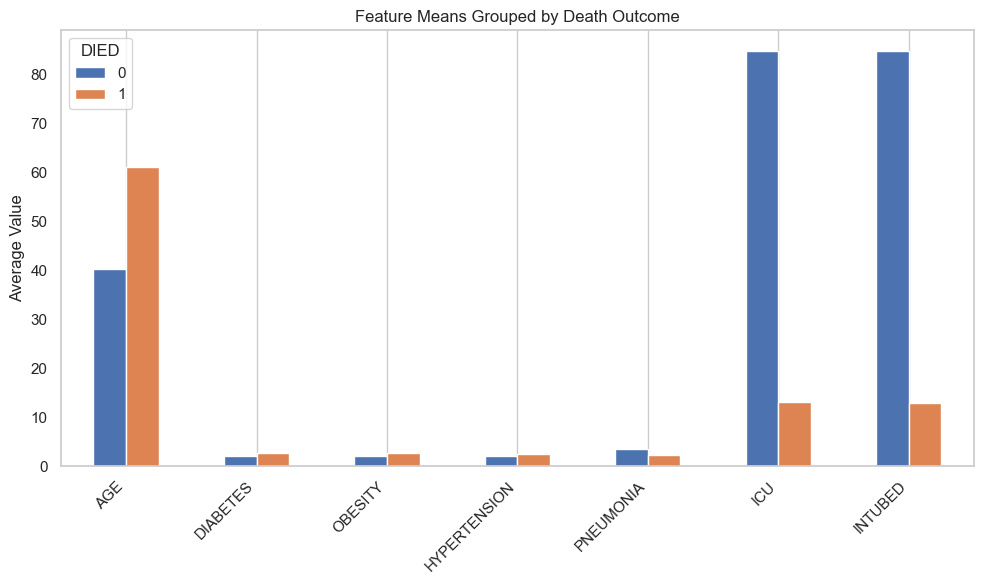

DIED,0,1
AGE,40.209341,60.968793
DIABETES,2.168052,2.746252
OBESITY,2.062485,2.749387
HYPERTENSION,2.101994,2.535296
PNEUMONIA,3.490428,2.197465
ICU,84.673426,13.146225
INTUBED,84.664792,12.899836


In [76]:
# 重要特征列表
important_features = ['AGE', 'DIABETES', 'OBESITY', 'HYPERTENSION', 'PNEUMONIA', 'ICU', 'INTUBED']

# 按DIED列分组，计算均值
group_means = df.groupby('DIED')[important_features].mean().T

# 绘制柱状图
group_means.plot(kind='bar', figsize=(10,6))
plt.title("Feature Means Grouped by Death Outcome")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 打印均值表（可选）
display(group_means)



## 1.9 简易baseline decision tree

In [77]:
# 准备数据
X = df[important_features]
y = df['DIED']

# 先简单把缺失的97/98/99处理成众数（防止出错）
X = X.replace([97,98,99], np.nan)
X = X.fillna(X.mode().iloc[0])

# 切分训练验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 训练简单决策树
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train, y_train)

# 验证集评估
y_pred = simple_tree.predict(X_val)
print("📋 Baseline Decision Tree Evaluation:")
print(classification_report(y_val, y_pred, digits=4))

📋 Baseline Decision Tree Evaluation:
              precision    recall  f1-score   support

           0     0.9479    0.9948    0.9708     18532
           1     0.8243    0.3099    0.4505      1468

    accuracy                         0.9445     20000
   macro avg     0.8861    0.6524    0.7106     20000
weighted avg     0.9388    0.9445    0.9326     20000



## 1.10 Missing value 填充

In [78]:
print("\n🔧 Step 1.10 - Handling Missing Values...")

# 重新识别特征类型
categorical_features = []
numerical_features = []
special_features = []

for col in df.columns:
    if col in ["DATE_DIED", "DIED"]:
        special_features.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        if df[col].nunique() <= 20:  # 少量不同值 → 分类变量
            categorical_features.append(col)
        else:
            numerical_features.append(col)
    else:
        categorical_features.append(col)

# 替换 97/98/99 为 np.nan
df = df.replace([97, 98, 99], np.nan)

# 填补分类特征（用众数）
for col in categorical_features:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

# 填补数值特征（用中位数）
for col in numerical_features:
    median = df[col].median()
    df[col] = df[col].fillna(median)

print("✅ Missing values handled successfully!")


🔧 Step 1.10 - Handling Missing Values...
✅ Missing values handled successfully!


##  1.11 修正数据格式并保存干净版

In [79]:
print("\n💾 Step 1.11 - Fix data types and Save Clean Dataset...")

# 把浮点型且应为整数的列，转为 Int64
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('Int64')

# 特别注意：AGE如果也不要小数点的话，就一视同仁这样处理！

# 保存干净的数据
df.to_csv("./data/custom_covid19_cleaned.csv", index=False)
print("📁 Cleaned dataset saved as 'custom_covid19_cleaned.csv'")


💾 Step 1.11 - Fix data types and Save Clean Dataset...
📁 Cleaned dataset saved as 'custom_covid19_cleaned.csv'



---


## 🎯 Step 2: Task O1 - Death Prediction (Classification)



### 2.1 Data Preparation
- 选择特征列和目标列 X: 之前标记过的important_features_O1 Y: 'DIED' 列
- 训练集/验证集划分（train_test_split）


In [80]:
# 准备数据
X = df[important_features_O1]
y = df['DIED']

# 简单填补（防止残留缺失）
X = X.replace([97, 98, 99], np.nan)
X = X.fillna(X.mode().iloc[0])

# 切分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data prepared: X_train, X_val, y_train, y_val")


✅ Data prepared: X_train, X_val, y_train, y_val



### 2.2 Model Training
- Decision Tree Classifier（baseline）
- 可选：SVM, Logistic Regression


#### 2.2-1 训练 Decision Tree (Baseline)


In [81]:
# 创建决策树模型
dt_model = DecisionTreeClassifier(
    max_depth=5,   # 限制树的深度，防止过拟合
    random_state=42
)

# 拟合训练集
dt_model.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully.")

✅ Decision Tree model trained successfully.


#### 2.2-2 评估 Decision Tree (Baseline)

📋 Decision Tree - Validation Set Evaluation:
              precision    recall  f1-score   support

           0     0.9491    0.9935    0.9708     18532
           1     0.8003    0.3277    0.4650      1468

    accuracy                         0.9446     20000
   macro avg     0.8747    0.6606    0.7179     20000
weighted avg     0.9382    0.9446    0.9337     20000

Decision Tree MCC: 0.4906


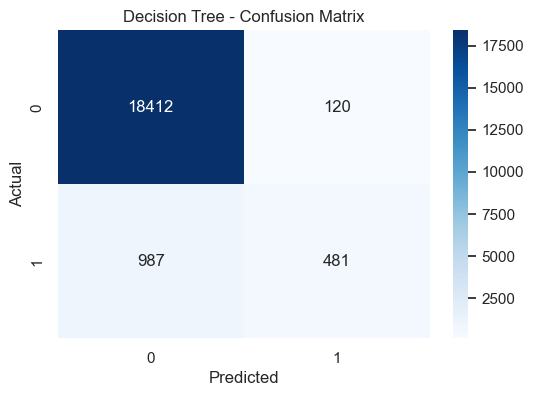

In [82]:
# 预测验证集
y_pred_dt = dt_model.predict(X_val)

# 打印评估报告
print("📋 Decision Tree - Validation Set Evaluation:")
print(classification_report(y_val, y_pred_dt, digits=4))

# Decision Tree MCC
mcc_dt = matthews_corrcoef(y_val, y_pred_dt)
print(f"Decision Tree MCC: {mcc_dt:.4f}")

# 绘制混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_val, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2.3-1 Logistic Regression - 训练 (Training)

In [83]:
print("\n🚀 Logistic Regression - Model Training...")

# 只进行特征缩放，不重新切分
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 训练Logistic回归模型
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

print("✅ Logistic Regression model trained successfully!")


🚀 Logistic Regression - Model Training...
✅ Logistic Regression model trained successfully!


#### 2.3-2 Logistic 评估

📋 Logistic Regression - Validation Set Evaluation:
              precision    recall  f1-score   support

           0     0.9548    0.9848    0.9696     18532
           1     0.6828    0.4121    0.5140      1468

    accuracy                         0.9428     20000
   macro avg     0.8188    0.6985    0.7418     20000
weighted avg     0.9349    0.9428    0.9362     20000

Logistic Regression MCC: 0.5031


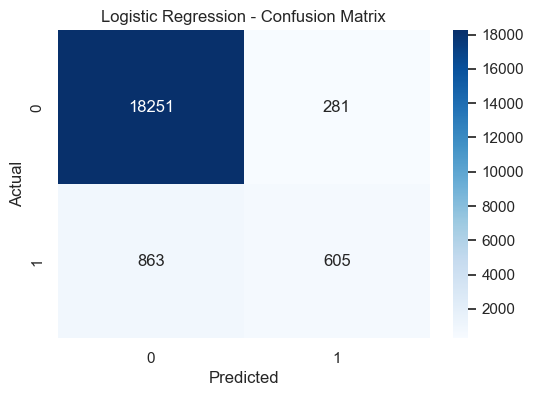

In [84]:
# 用模型在验证集上预测
y_pred_logreg = logreg.predict(X_val_scaled)

# 打印分类评估报告
print("📋 Logistic Regression - Validation Set Evaluation:")
print(classification_report(y_val, y_pred_logreg, digits=4))

# Logistic Regression MCC
mcc_logreg = matthews_corrcoef(y_val, y_pred_logreg)
print(f"Logistic Regression MCC: {mcc_logreg:.4f}")

# 混淆矩阵
conf_mat_logreg = confusion_matrix(y_val, y_pred_logreg)

# 绘制混淆矩阵图
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 2.4 Model Comparison and Selection
- 比较了 Decision Tree 和 Logistic Regression。
- Logistic Regression 的 F1-score (0.5140 vs 0.4650) 和 MCC (0.5031 vs 0.4906) 略优。
- 逻辑回归在召回死亡患者方面更好，因此，选择 Logistic Regression 作为后续重点优化对象。


### 2.5 Logistic Regression Model Tuning 
- 目标：找到更好的 C（正则化强度）
- 方法：用 GridSearchCV 网格搜索
- 评估指标：用 f1_score 作为选择标准（同 EC8 要求）


In [85]:
# 定义参数网格
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 仅调节正则化强度
}

# 定义模型
logreg = LogisticRegression(max_iter=500, random_state=42)

# 设置 GridSearch，仅针对C参数
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1',  # 使用F1作为评估标准
    cv=5,          # 5折交叉验证
    n_jobs=-1      # 全核并行，提速（可选）
)

# 执行搜索
grid_search.fit(X_train, y_train)

# 输出最佳结果
print("✅ GridSearchCV finished (only tuning C).")
print("Best C:", grid_search.best_params_['C'])
print("Best F1 score:", grid_search.best_score_)

✅ GridSearchCV finished (only tuning C).
Best C: 100
Best F1 score: 0.529585372532219


### 2.6 Decision Tree Model Tuning (Optional)


In [86]:
# 目的: 验证调参后的Decision Tree是否能超越Logistic回归
# 方法: 使用GridSearchCV对 max_depth, min_samples_split, ccp_alpha 调优
# 虽然已经确定了, decision tree不如logistic, 但是他更灵活, 能调整更多的参数, 所以我依旧选择尝试了一下, 但是依旧不如logistic

# 定义参数网格
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': [0.0, 0.0001, 0.001]
}

# 建立模型
dt = DecisionTreeClassifier(random_state=42)

# GridSearch
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# 执行搜索
grid_search_dt.fit(X_train, y_train)

# 输出最佳超参数
print("✅ GridSearchCV for Decision Tree finished.")
print("Best Parameters:", grid_search_dt.best_params_)
print("Best F1 score:", grid_search_dt.best_score_)

✅ GridSearchCV for Decision Tree finished.
Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_split': 10}
Best F1 score: 0.5097785339798295


### 2.7 保存best model: logistic regression的

In [87]:
# 保存Best Model（以 logistic_regression_best.pkl 命名）
with open('./models/logistic_regression_best.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

print("✅ Best Logistic Regression model saved as 'logistic_regression_best.pkl'")

✅ Best Logistic Regression model saved as 'logistic_regression_best.pkl'



---


## 🎯 Step 3: Task O2 - Age Prediction (Regression)



### 3.1 Data Preparation
- 特征工程（如标准化StandardScaler）
- 训练集/验证集划分


In [88]:
# 选择特征列（important_features_O2）和目标列（AGE）
X = df[important_features_O2]
y = df['AGE']

# 确保没有缺失值
X = X.replace([97, 98, 99], np.nan)
X = X.fillna(X.mode().iloc[0])  # 分类特征用众数补齐

# 标准化特征（因为大多数回归模型受特征尺度影响）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 切分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data prepared for Age Prediction: X_train, X_val, y_train, y_val")

✅ Data prepared for Age Prediction: X_train, X_val, y_train, y_val



### 3.2 Model Training
- Ridge Regression（baseline）
- 可选：SVR, Random Forest Regressor



### 3.3 Model Evaluation
- 打印 RMSE, R², Pearson Correlation
- 绘制真实值 vs 预测值散点图



---



## 🎯 Step 4: Task O3 - Covid vs Non-Covid Classification



### 4.1 Data Preparation
- 特征选择
- 划分训练集和验证集



### 4.2 Model Training
- Decision Tree Classifier（baseline）
- 可选：SVM（含RBF核）、Logistic Regression



### 4.3 Model Evaluation
- 打印 Precision, Recall, F1-score, MCC
- Confusion Matrix图示



---



## 🧠 Step 5: Task O4 - Feature Summary and Insights



### 5.1 Top Features Summary
- 总结O1/O2/O3中最重要的特征
- 分类别列举（比如：死亡预测最重要的top5特征）



### 5.2 Attribute Importance Table
- 可以用表格列出每个任务重要特征及其影响



### 5.3 Final Observations
- 经验总结
- 对未来优化的建议



---



# 📋 End of Report
